In [14]:
import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

# read the CSV file into a pandas DataFrame, using the first row as column names and the second column as row labels
df = pd.read_csv('NIO.csv')
df.set_index('Date', inplace=True)
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-09,3.44,3.58,3.33,3.46,3.46,54644200
2020-01-10,3.49,3.58,3.40,3.51,3.51,35626700
2020-01-13,3.71,3.73,3.52,3.70,3.70,59752700
2020-01-14,3.70,3.82,3.61,3.76,3.76,55194000
2020-01-15,4.19,4.48,4.00,4.29,4.29,236357900
...,...,...,...,...,...,...
2023-03-31,10.31,10.60,10.20,10.51,10.51,35787400
2023-04-03,10.41,10.51,9.67,9.80,9.80,56526200
2023-04-04,9.62,9.79,9.12,9.21,9.21,53384400


In [15]:
df.shape

(817, 6)

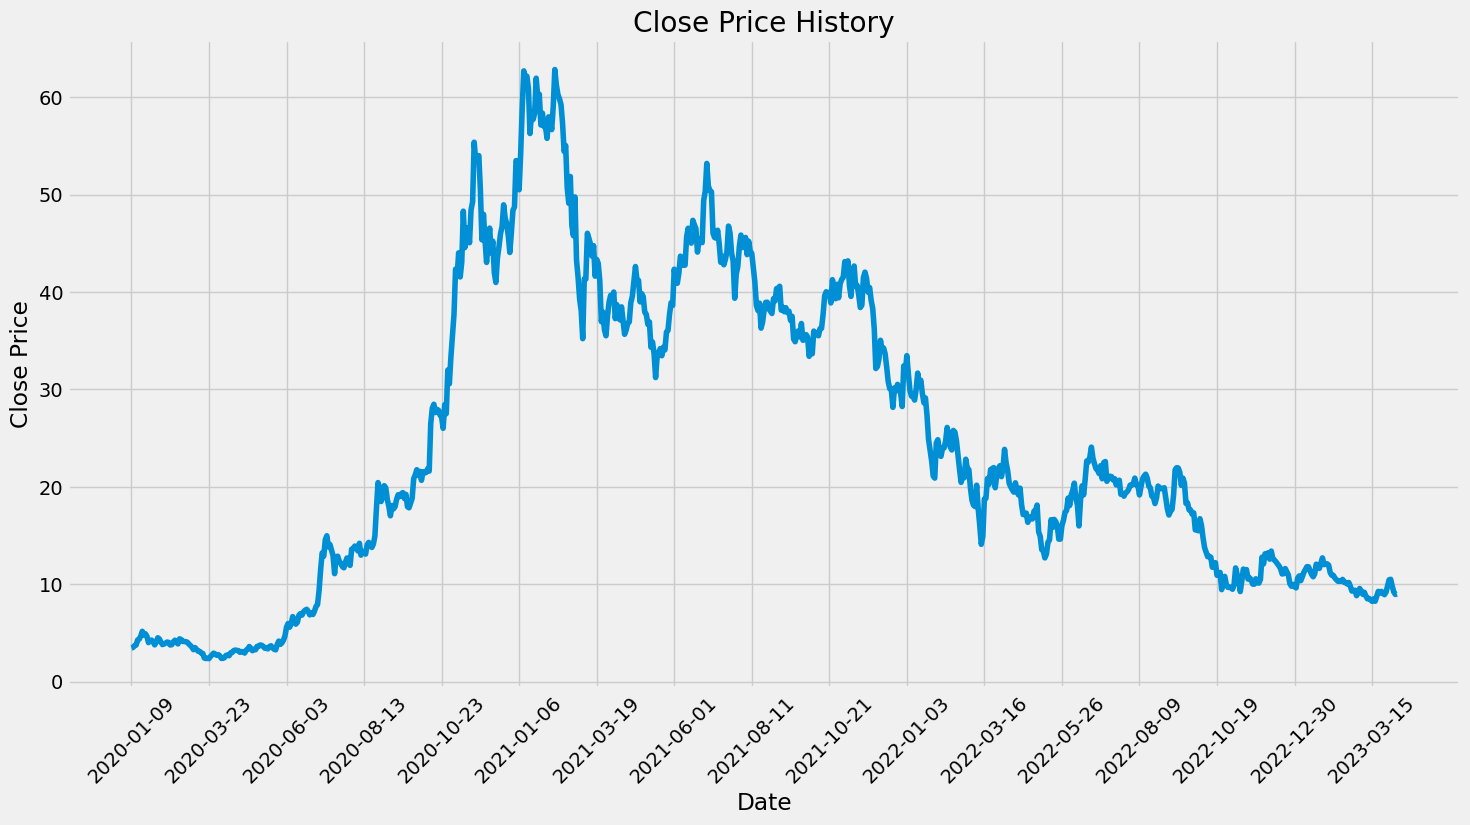

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xticks(range(0, len(df.index), 50), df.index[::50], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [17]:
data = df['Close']
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

654

In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

# print the normalized array
print(scaled_data)

[[1.80254672e-02]
 [1.88523235e-02]
 [2.19943774e-02]
 [2.29866049e-02]
 [3.17512816e-02]
 [3.30742517e-02]
 [3.80353894e-02]
 [4.63039524e-02]
 [4.00198446e-02]
 [4.21696709e-02]
 [3.78700182e-02]
 [2.71208864e-02]
 [3.04283116e-02]
 [3.14205391e-02]
 [2.82784852e-02]
 [2.33173474e-02]
 [2.79477427e-02]
 [3.53894493e-02]
 [3.34049942e-02]
 [2.82784852e-02]
 [2.38134612e-02]
 [2.48056888e-02]
 [2.62940301e-02]
 [2.81131139e-02]
 [2.74516289e-02]
 [2.31519762e-02]
 [2.36480900e-02]
 [2.82784852e-02]
 [3.12551679e-02]
 [2.82784852e-02]
 [2.49710600e-02]
 [3.35703655e-02]
 [3.25781379e-02]
 [2.92707128e-02]
 [2.91053415e-02]
 [2.87745990e-02]
 [2.79477427e-02]
 [2.48056888e-02]
 [2.23251199e-02]
 [1.95138085e-02]
 [1.52141558e-02]
 [1.86869522e-02]
 [1.57102696e-02]
 [1.25682156e-02]
 [1.22374731e-02]
 [9.42616173e-03]
 [8.76467670e-03]
 [9.92227551e-04]
 [1.65371258e-04]
 [4.96113775e-04]
 [0.00000000e+00]
 [3.80353894e-03]
 [6.44947908e-03]
 [9.26079047e-03]
 [7.77244915e-03]
 [5.622622

In [19]:
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(X_train)
        print(y_train)
        print()

[array([0.01802547, 0.01885232, 0.02199438, 0.0229866 , 0.03175128,
       0.03307425, 0.03803539, 0.04630395, 0.04001984, 0.04216967,
       0.03787002, 0.02712089, 0.03042831, 0.03142054, 0.02827849,
       0.02331735, 0.02794774, 0.03538945, 0.03340499, 0.02827849,
       0.02381346, 0.02480569, 0.02629403, 0.02811311, 0.02745163,
       0.02315198, 0.02364809, 0.02827849, 0.03125517, 0.02827849,
       0.02497106, 0.03357037, 0.03257814, 0.02927071, 0.02910534,
       0.0287746 , 0.02794774, 0.02480569, 0.02232512, 0.01951381,
       0.01521416, 0.01868695, 0.01571027, 0.01256822, 0.01223747,
       0.00942616, 0.00876468, 0.00099223, 0.00016537, 0.00049611,
       0.        , 0.00380354, 0.00644948, 0.00926079, 0.00777245,
       0.00562262, 0.00678022, 0.0046304 , 0.00033074, 0.00049611])]
[0.0016537125847527756]



In [20]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(594, 60, 1)

In [21]:
test_data = scaled_data[training_data_len - 60: , :]
X_test = []
y_test = dataset[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 54,145
Trainable params: 54,145
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
38/38 [==============================] - 3s 17ms/step - loss: 0.0261
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0036
Epoch 3/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0034
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0040
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0026
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0024
Epoch 8/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0029
Epoch 9/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0022
Epoch 10/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 12/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 13/100
38/38 [=====

38/38 [==============================] - 1s 18ms/step - loss: 7.1282e-04
Epoch 98/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 99/100
38/38 [==============================] - 1s 18ms/step - loss: 8.4854e-04
Epoch 100/100
38/38 [==============================] - 1s 18ms/step - loss: 7.3821e-04


In [24]:
predictions = model.predict(X_test) 
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 0s 7ms/step


In [25]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7805180039099947

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]

In [27]:
valid

Date
2022-08-15    21.299999
2022-08-16    20.910000
2022-08-17    20.080000
2022-08-18    19.910000
2022-08-19    19.049999
                ...    
2023-03-31    10.510000
2023-04-03     9.800000
2023-04-04     9.210000
2023-04-05     8.960000
2023-04-06     9.010000
Name: Close, Length: 163, dtype: float64

In [28]:
predictions

array([[21.649574 ],
       [21.864368 ],
       [21.572618 ],
       [20.815746 ],
       [20.447222 ],
       [19.792784 ],
       [19.542019 ],
       [19.067675 ],
       [19.334923 ],
       [20.36157  ],
       [20.59836  ],
       [20.456034 ],
       [20.351467 ],
       [20.37095  ],
       [19.588713 ],
       [18.549587 ],
       [17.819876 ],
       [17.936392 ],
       [18.235506 ],
       [19.394999 ],
       [21.683332 ],
       [22.554525 ],
       [22.523468 ],
       [22.03673  ],
       [20.858076 ],
       [21.074276 ],
       [20.99391  ],
       [19.470991 ],
       [18.971413 ],
       [18.465067 ],
       [18.326593 ],
       [18.023285 ],
       [17.99366  ],
       [16.779531 ],
       [16.385885 ],
       [16.1546   ],
       [16.944284 ],
       [16.829521 ],
       [15.812849 ],
       [14.703742 ],
       [14.027481 ],
       [13.58813  ],
       [13.525233 ],
       [13.49599  ],
       [12.830085 ],
       [12.799702 ],
       [12.85457  ],
       [12.06

In [29]:
val_df = valid.to_frame()
val_df

,Close
Date,
2022-08-15,21.299999
2022-08-16,20.910000
2022-08-17,20.080000
2022-08-18,19.910000
2022-08-19,19.049999
...,...
2023-03-31,10.510000
2023-04-03,9.800000
2023-04-04,9.210000


In [30]:
pred_df = pd.DataFrame(predictions, columns=['Predictions'])
pred_df

,Predictions
0,21.649574
1,21.864368
2,21.572618
3,20.815746
4,20.447222
...,...
158,10.902889
159,11.184449
160,10.809527
161,10.225560


In [31]:
val_df_index = valid.index
pred_df.index = val_df_index

In [32]:
pred_df

,Predictions
Date,
2022-08-15,21.649574
2022-08-16,21.864368
2022-08-17,21.572618
2022-08-18,20.815746
2022-08-19,20.447222
...,...
2023-03-31,10.902889
2023-04-03,11.184449
2023-04-04,10.809527


In [33]:
val_pred = pd.concat([val_df, pred_df], axis=1)

In [34]:
val_pred

,Close,Predictions
Date,,
2022-08-15,21.299999,21.649574
2022-08-16,20.910000,21.864368
2022-08-17,20.080000,21.572618
2022-08-18,19.910000,20.815746
2022-08-19,19.049999,20.447222
...,...,...
2023-03-31,10.510000,10.902889
2023-04-03,9.800000,11.184449
2023-04-04,9.210000,10.809527


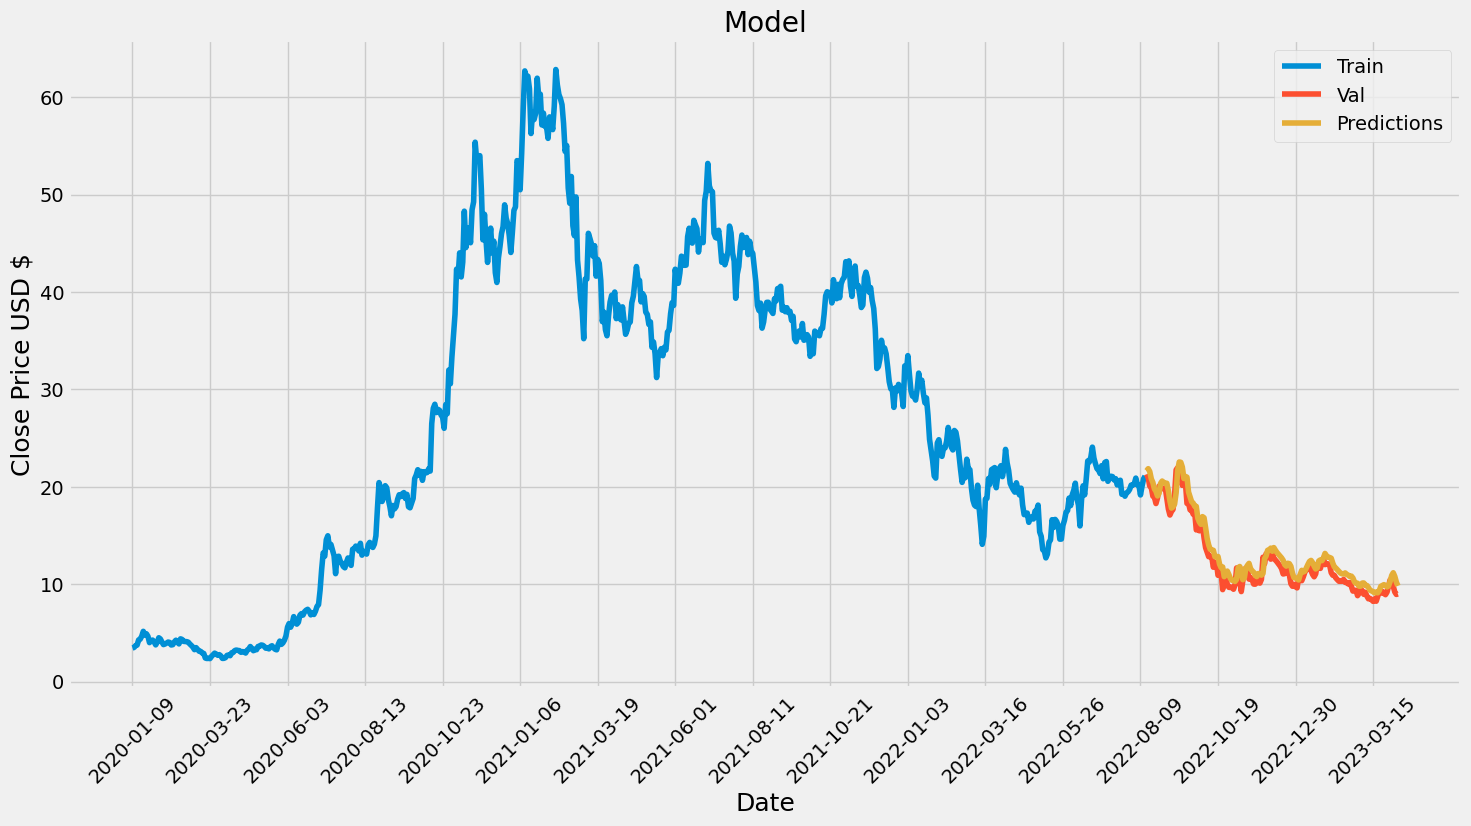

In [35]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train)
plt.plot(val_pred['Close'])
plt.plot(val_pred['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.xticks(range(0, len(df.index), 50), df.index[::50], rotation=45)
plt.show()